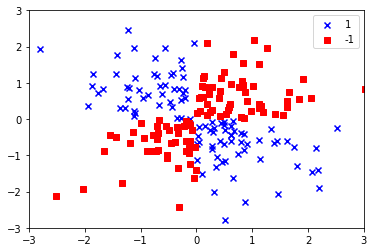

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#产生具有随机噪声的XOR数据集
np.random.seed(1)
#从标准正态分布中返回一个或多个样本值
X_xor = np.random.randn(200,2)
#形成一个异或门，其中100个样本的分类标签为1，100个样本分类标签为-1
Y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
Y_xor = np.where(Y_xor, 1, -1)
plt.scatter(X_xor[Y_xor == 1, 0], X_xor[Y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[Y_xor == -1, 0], X_xor[Y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,Y,classifier,resolution=0.02):
    #定义颜色和标记，创建色度图
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])

    #画出目标界面
    x1_min,x1_max = X[:,0].min()-1 , X[:,0].max()+1  #横坐标最大值和最小值
    x2_min,x2_max = X[:,1].min()-1 , X[:,1].max()+1  #纵坐标最大值和最小值
    #绘制网格图，利用矩阵
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    #ravel函数将矩阵变为一维数组
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #填充等高线
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(Y)):
        #X,Y均为矩阵，把点画出来
        plt.scatter(x=X[Y == cl,0] , y=X[Y == cl,1] , alpha = 0.8 , c = colors[idx] , marker = markers[idx] , label = cl , edgecolor = 'black')


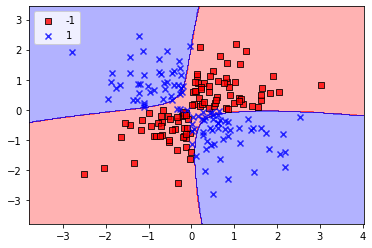

In [4]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, Y_xor)
plot_decision_regions(X_xor, Y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()